In [1]:
#!pip install -r ../requirements.txt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import nltk
import spacy
import os
import string

In [3]:
df = pd.read_excel('../data/ep2-pln-train.xlsx')
df.head()

,req_text,age
0,- Quantos empregados em cada um dos atuais nív...,a2
1,- Solicito cópia das Atas do Conselho de Admin...,a2
2,"- Solicito informar a norma (lei, decreto, por...",a2
3,"- Solicito por gentileza, a informação sobre a...",a2
4,"- Solicito por gentileza, a informação sobre a...",a2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8200 entries, 0 to 8199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   req_text  8200 non-null   object
 1   age       8200 non-null   object
dtypes: object(2)
memory usage: 128.3+ KB


In [5]:
df.describe()

,req_text,age
count,8200,8200
unique,8184,4
top,"boa tarde, cordiais saudações para um 2018 de ...",a3
freq,5,3000


In [7]:
df['req_text'].describe()

count                                                  8200
unique                                                 8184
top       boa tarde, cordiais saudações para um 2018 de ...
freq                                                      5
Name: req_text, dtype: object

# Word Cloud

In [9]:
word_string = "".join(df['req_text'].str.lower())

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stopwords = nltk.corpus.stopwords.words('portuguese')

(-0.5, 1599.5, 799.5, -0.5)

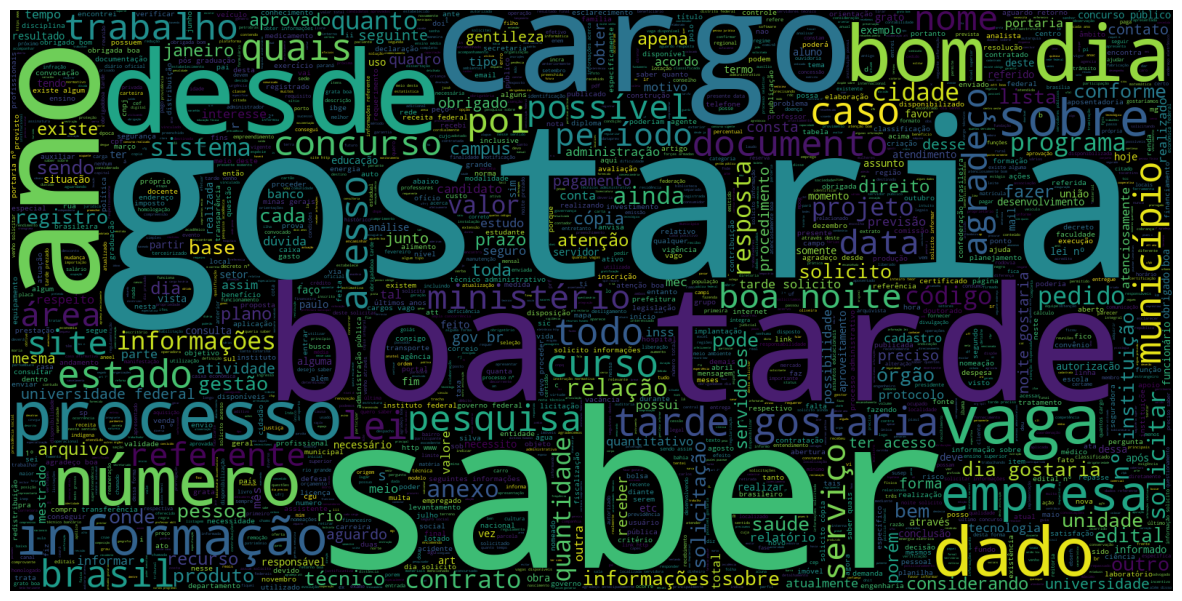

In [12]:
plt.figure(figsize=(15,15))

wc = wordcloud.WordCloud(stopwords=stopwords, max_words=2000, max_font_size=300, width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc)
plt.axis('off')

In [13]:
texts = df['req_text']
texts = texts.str.lower()
texts = texts.str.translate(str.maketrans('', '', string.punctuation))
#texts = texts.str.replace('[\d+]', '') #remove numeros

df['tokens'] = texts

In [14]:
df['tokens'] = [nltk.tokenize.word_tokenize(resp) for resp in df['tokens']]
df.head(10)

,req_text,age,tokens
0,- Quantos empregados em cada um dos atuais nív...,a2,"[quantos, empregados, em, cada, um, dos, atuai..."
1,- Solicito cópia das Atas do Conselho de Admin...,a2,"[solicito, cópia, das, atas, do, conselho, de,..."
2,"- Solicito informar a norma (lei, decreto, por...",a2,"[solicito, informar, a, norma, lei, decreto, p..."
3,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr..."
4,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr..."
5,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr..."
6,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr..."
7,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr..."
8,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr..."
9,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr..."


In [15]:
try:
    nlp = spacy.load("pt_core_news_sm")
except Exception:
    os.system("python -m spacy download pt_core_news_sm")
    nlp = spacy.load("pt_core_news_sm")

In [16]:
filtered = []
for sent in df['tokens']:
    sent = str(sent)
    doc = nlp(sent)
    temp = [token.lemma_ for token in doc if not token.is_punct]
    temp = " ".join(temp)
    filtered.append(temp)

In [17]:
df['lemma'] = filtered
df.head()

,req_text,age,tokens,lemma
0,- Quantos empregados em cada um dos atuais nív...,a2,"[quantos, empregados, em, cada, um, dos, atuai...",quanto empregado em cada um de o atual nível s...
1,- Solicito cópia das Atas do Conselho de Admin...,a2,"[solicito, cópia, das, atas, do, conselho, de,...",solicito cópia de o ata de o conselho de admin...
2,"- Solicito informar a norma (lei, decreto, por...",a2,"[solicito, informar, a, norma, lei, decreto, p...",solicito informar o norma lei decreto portaria...
3,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr...",solicito por gentileza o informação sobre o qu...
4,"- Solicito por gentileza, a informação sobre a...",a2,"[solicito, por, gentileza, a, informação, sobr...",solicito por gentileza o informação sobre o qu...


In [18]:
word_string = "".join(df['lemma'].str.lower())

(-0.5, 1599.5, 799.5, -0.5)

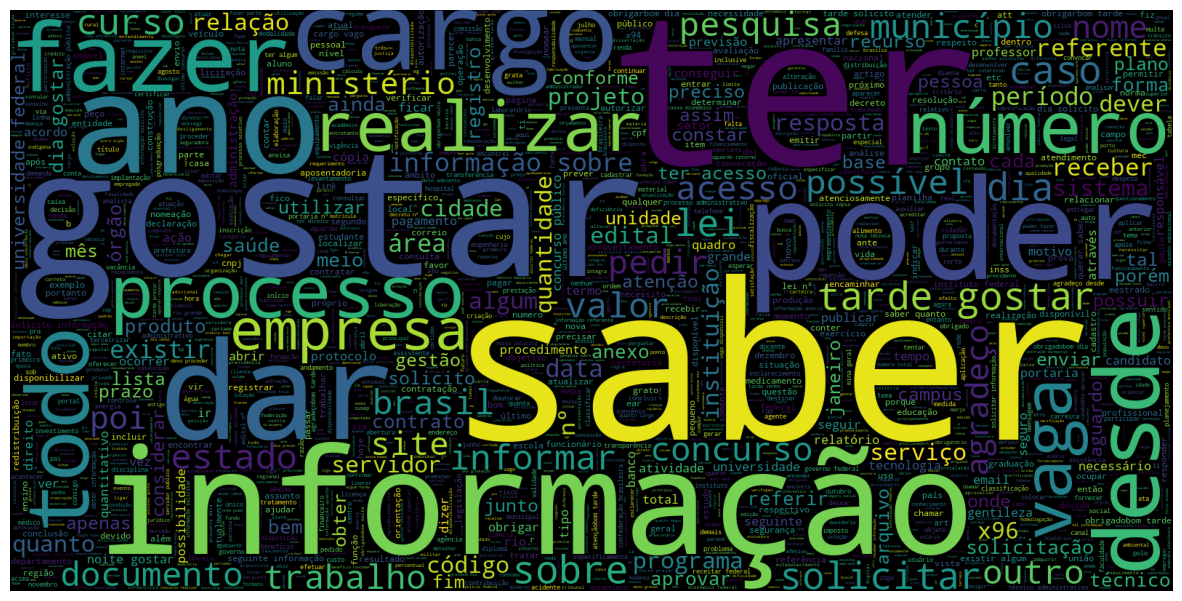

In [19]:
plt.figure(figsize=(15,15))

wc = wordcloud.WordCloud(stopwords=stopwords, max_words=2000, max_font_size=300, width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc)
plt.axis('off')